# Weekly Covid Charts - Regional Groups

Author: Brian L. Fuller
Date Begun: 2020-10-16

In [15]:
import numpy as np
import pandas as pd

from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as mplt

import bqplot
from bqplot import pyplot as plt


## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with article at:

https://www.nytimes.com/article/coronavirus-county-data-us.html

The data is pulled from the NYTimes github repo and should be located at the same level as this repo to be properly accessed. User must pull that repo in order to utilize updated numbers in this notebook.


In [16]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

path_covid_data_us_counties = rootpath / '..' / 'covid-19-data' / 'us-counties.csv'

### Update this line
county_data_path = path_covid_data_us_counties

df_covid_data_us_counties = pd.read_csv(county_data_path, parse_dates=True)

# put fips=36061 as fips code for NYC
df_covid_data_us_counties.loc[df_covid_data_us_counties.county == "New York City", 'fips'] = 36061

# for now, get rid of null fips
df_covid = df_covid_data_us_counties[df_covid_data_us_counties.fips.notna()]

# convert the fips column to an int
df_covid['fips'] = df_covid['fips'].astype(int)

<ipython-input-16-1edbf56f9471>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['fips'] = df_covid['fips'].astype(int)


In [17]:
# Helper Functions - entity access

def fips_for_group(data, group="DC Metro"):
    fips_list = []
    for fip in data[data['group']==group]['fips']:
        for fi in fip:
            fips_list.append(fi)
    return fips_list

def fips_for_state(data, state='VA'):
    fips_list = []
    for fip in data[data['state'] == state]['fips']:
        for fi in fip:
            fips_list.append(fi)
    return fips_list

def fips_for_county(data, county='Fairfax'):
    fips_list = []
    for fip in data[data['county'] == county]['fips']:
        for fi in fip:
            fips_list.append(fi)
    return fips_list

def frame_from_group(data_covid, data_groups, group="DC Metro"):
    fipslist = fips_for_group(data_groups, group)
    
    # filter the frame
    df = data_covid[data_covid.fips.isin(fipslist)]
    
    # get group population
    pop2020 = sum(data_groups[data_groups['group'] == group]['pop'])
    
    # derive new columns
    df = df.groupby(['date'])[['cases', 'deaths']].agg('sum').diff().reset_index()
    
    df['cases_7d'] = df.cases.rolling(7).mean().shift(-6)
    df['cases_100k'] = df['cases'] / pop2020 * 100000
    df['cases_7d_100k'] = df['cases_7d'] / pop2020 * 100000
    
    return df

def mpl_plot_from_group(df_covid, df_entity, group="DC Metro", ymax=80):
    df = frame_from_group(df_covid, df_entity, group)
    fig = mplt.figure(figsize=(14, 10))
    sns.lineplot(x="date",
                 y="cases_100k",
                 label="Daily",
                 data=df,
                 ci=None,
                 alpha=0.4)

    plot_ =  sns.lineplot(x="date",
                          y="cases_7d_100k",
                          label="7-Day Average",
                          data=df)
    fig.canvas.draw()
    mplt.legend()
    mplt.xlabel("Date", size=14)
    mplt.ylabel("Daily New Cases per 100,000 population", size=14)
    mplt.ylim(0, ymax)

    new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
    mplt.xticks(range(0, len(new_ticks), 3), new_ticks[::3], 
               rotation=60, 
               fontweight='light', 
               fontsize="x-small");
    return

## Regions

- DC Metro Area
- Tampa Metro Area
- Others?

### DC Metro - Virginia Counties:

- Culpeper county, va (51047) | 51859
- Fauquier county, va (51061) | 70675
- Spotsylvania county, va(51177) | 134238
- Stafford county, va (51179) | 149960
- Prince William county, va (51153) | 468011
- Fairfax county, va (51059)| 1150800
- Loudoun county, va (51107)| 406850
- Arlington county, va (51013) | 237521

### DC Metro - Independent Virginia Cities:

- City of Fredericksburg, VA (51630) | 29144
- City of Manassas, VA (51683) | 41641
- City of Fairfax, VA (51600) | 24574
- City of Falls Church, VA (51610) | 14772
- City of Alexandria, VA (51510) | 160530

### DC Metro - Federal District:

- District of Columbia, DC (11000, 11001, 11000) | 702455

### DC Metro - Maryland Counties:

- Charles county, md (24017) | 161503
- Prince Georges county, md (24033) | 909308
- Montgomery county, md (24031) | 1052570
- Howard county, md (24027) | 323196
- Anne Arundel county, md (fips 24003) | 576031
- Frederick county, md (24021) | 255648

https://worldpopulationreview.com/us-counties/states/va
https://worldpopulationreview.com/us-counties/states/dc
https://worldpopulationreview.com/us-counties/states/md


total pop (2020) = 6,921,286

### Tampa Metro - Florida Counties:

- Hillsborough County, FL (12057), pop = 1,436,890
- Pinellas (12103), pop = 975,280
- Pasco (12101), pop = 539,630

total pop = 2,951,800 (2020)

population from https://worldpopulationreview.com/us-counties/states/fl

In [18]:
# entity setup
culpeper = {'name': "Culpeper County, VA",          'pop':   51859, 'fips': [51047], 'state': 'VA', 'county': "Culpeper",       'group': "DC Metro"}
fauquier = {'name': "Fauquier County, VA",          'pop':   70675, 'fips': [51061], 'state': 'VA', 'county': "Fauquier",       'group': "DC Metro"}
spotsylvania = {'name': "Spotsylvania County, VA",  'pop':  134238, 'fips': [51177], 'state': 'VA', 'county': "Spotsylvania",   'group': "DC Metro"}
stafford = {'name': "Stafford County, VA",          'pop':  149960, 'fips': [51179], 'state': 'VA', 'county': "Stafford",       'group': "DC Metro"}
pr_william = {'name': "Prince William Country, VA", 'pop':  468011, 'fips': [51153], 'state': 'VA', 'county': "Prince William", 'group': "DC Metro"}
fairfax = {'name': "Fairfax County, VA",            'pop': 1150800, 'fips': [51059], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}
loudoun = {'name': "Loudoun County, VA",            'pop':  406850, 'fips': [51107], 'state': 'VA', 'county': "Loudoun",        'group': "DC Metro"}
arlington = {'name': "Arlington County, VA",        'pop':  237521, 'fips': [51013], 'state': 'VA', 'county': "Arlington",      'group': "DC Metro"}

fredericksburg = {'name': "Fredericksburg, VA",     'pop':  29144, 'fips': [51630], 'state': 'VA', 'county': "Spotsylvania",   'group': "DC Metro"}
manassas = {'name': "Manassas, VA",                 'pop':  41641, 'fips': [51683], 'state': 'VA', 'county': "Prince William", 'group': "DC Metro"}
fairfax_city = {'name': "Fairfax City, VA",         'pop':  24574, 'fips': [51600], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}
falls_church = {'name': "City of Falls Church, VA", 'pop':  14772, 'fips': [51610], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}
alexandria = {'name': "City of Alexandria, VA",     'pop': 160530, 'fips': [51510], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}

dc = {'name': "District of Columbia", 'pop': 702455, 'fips': [11000, 11001], 'state': 'DC', 'county': "DC", 'group': "DC Metro"}

charles = {'name': "Charles County, MD",           'pop':  161503, 'fips': [24017], 'state': 'MD', 'county': "Charles",       'group': "DC Metro"}
pr_george = {'name': "Prince Georges County, MD",  'pop':  909308, 'fips': [24033], 'state': 'MD', 'county': "Prince George", 'group': "DC Metro"}
montgomery = {'name': "Montgomery County, MD",     'pop': 1052570, 'fips': [24031], 'state': 'MD', 'county': "Montgomery",    'group': "DC Metro"}
howard = {'name': "Howard County, MD",             'pop':  323196, 'fips': [24027], 'state': 'MD', 'county': "Howard",        'group': "DC Metro"}
anne_arundel = {'name': "Anne Arundel County, MD", 'pop':  576031, 'fips': [24003], 'state': 'MD', 'county': "Anne Arundel",  'group': "DC Metro"}
frederick = {'name': "Frederick County, MD",       'pop':  255648, 'fips': [24021], 'state': 'MD', 'county': "Frederick",     'group': "DC Metro"}

hillsborough = {'name': "Hillsborough County, FL", 'pop':  1436890, 'fips': [12057], 'state': 'FL', 'county': "Hillsborough", 'group': "Tampa Bay-Area"}
pinellas = {'name': "Pinellas County, FL",         'pop':   975280, 'fips': [12103], 'state': 'FL', 'county': "Pinellas",     'group': "Tampa Bay-Area"}
pasco = {'name': "Pasco County, FL",               'pop':   539630, 'fips': [12101], 'state': 'FL', 'county': "Pasco",        'group': "Tampa Bay-Area"}


df_entity = pd.DataFrame([culpeper, fauquier, spotsylvania, stafford, pr_william, fairfax,
                          loudoun, arlington, fredericksburg, manassas, fairfax_city,
                          falls_church, alexandria, dc, charles, pr_george, montgomery, howard,
                          anne_arundel, frederick, hillsborough, pinellas, pasco])

In [19]:
# check the regional population
assert sum(df_entity[df_entity['group']=='DC Metro']['pop']) == 6921286

In [20]:
frame_from_group(df_covid, df_entity, "DC Metro").tail(20)

date  cases  deaths    cases_7d  cases_100k  cases_7d_100k
208  2020-09-29  582.0     5.0  564.714286    8.408842       8.159095
209  2020-09-30  433.0    10.0  547.714286    6.256063       7.913476
210  2020-10-01  498.0     8.0  545.142857    7.195195       7.876323
211  2020-10-02  688.0     6.0  607.857143    9.940349       8.782431
212  2020-10-03  519.0     0.0  615.857143    7.498606       8.898016
213  2020-10-04  739.0     4.0  634.142857   10.677207       9.162211
214  2020-10-05  494.0     2.0  630.714286    7.137402       9.112675
215  2020-10-06  463.0     4.0  655.142857    6.689508       9.465623
216  2020-10-07  415.0     7.0  686.571429    5.995996       9.919709
217  2020-10-08  937.0    14.0  707.285714   13.537947      10.218993
218  2020-10-09  744.0     9.0  685.142857   10.749447       9.899069
219  2020-10-10  647.0     4.0  695.714286    9.347974      10.051807
220  2020-10-11  715.0     7.0  688.142857   10.330450       9.942413
221  2020-10-12  665.0     1.0  690.142857    9.608041       9.971310
222  2020-10-13  683.0     8.0         NaN    9.868108            NaN
223  2020-10-14  560.0     7.0         NaN    8.090982            NaN
224  2020-10-15  782.0     8.0         NaN   11.298478            NaN
225  2020-10-16  818.0     5.0         NaN   11.818613            NaN
226  2020-10-17  594.0     6.0         NaN    8.582220            NaN
227  2020-10-18  729.0     3.0         NaN   10.532725            NaN

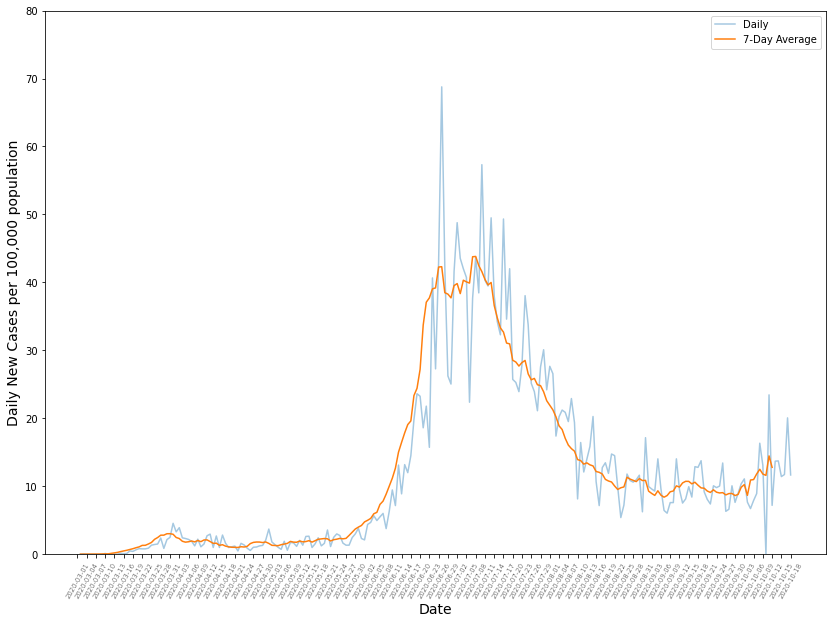

In [21]:
mpl_plot_from_group(df_covid, df_entity, "Tampa Bay-Area")

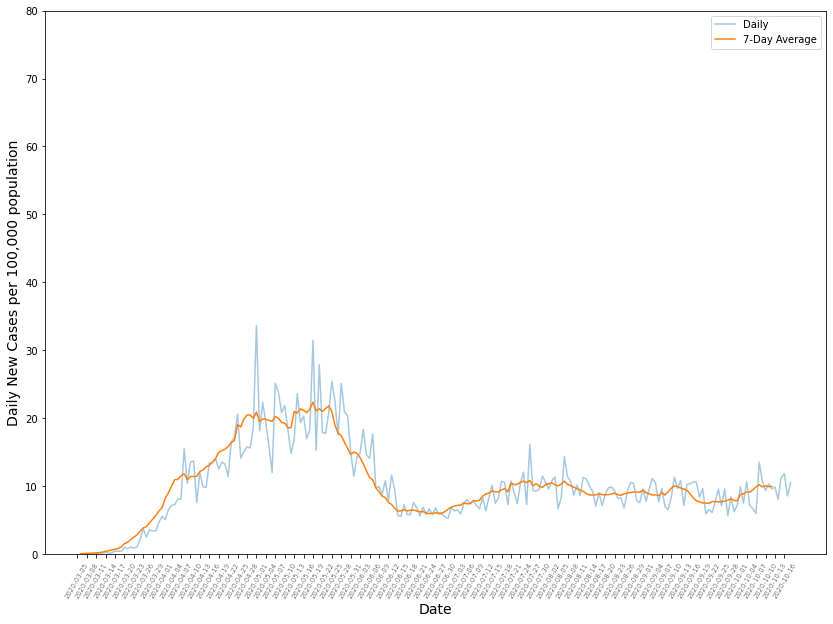

In [22]:
mpl_plot_from_group(df_covid, df_entity, "DC Metro")

In [9]:
    mytitle = "DC Metro"
    group = "DC Metro"


    df = frame_from_group(df_covid, df_entity, group)
    df['cases_7d_100k'].tail(20)

205     7.731841
206     7.787570
207     7.944436
208     8.159095
209     7.913476
210     7.876323
211     8.782431
212     8.898016
213     9.162211
214     9.112675
215     9.465623
216     9.919709
217    10.218993
218     9.899069
219          NaN
220          NaN
221          NaN
222          NaN
223          NaN
224          NaN
Name: cases_7d_100k, dtype: float64

In [13]:
    xs = bqplot.DateScale()
    ys = bqplot.LinearScale()
    
    line = bqplot.Lines(x=df['date'],
                        y=df['cases'],
                        scales={'x': xs, 'y': ys})
    xax = bqplot.Axis(scale=xs)
    yax = bqplot.Axis(scale=ys, orientation='vertical')
    
    bqplot.Figure(marks=[line], axes=[xax, yax], title=mytitle, animate=True, enable_hover=True)
    # fig = plt.figure(title=mytitle)
    
    # line = plt.plot(x=df['date'].values, y=df['cases'].values)
    # plt.show()

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [14]:
    fig = plt.figure(title=mytitle)
    
    line = plt.plot(x=df['date'].values, y=df['cases'].values)
    plt.show()

In [10]:
df['date']

0      2020-03-05
1      2020-03-06
2      2020-03-07
3      2020-03-08
4      2020-03-09
          ...    
220    2020-10-11
221    2020-10-12
222    2020-10-13
223    2020-10-14
224    2020-10-15
Name: date, Length: 225, dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['date']

0     2020-03-05
1     2020-03-06
2     2020-03-07
3     2020-03-08
4     2020-03-09
         ...    
220   2020-10-11
221   2020-10-12
222   2020-10-13
223   2020-10-14
224   2020-10-15
Name: date, Length: 225, dtype: datetime64[ns]